In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import cv2 as cv
import random
import time
import shutil

from constants import *
from visualisation import *
from character_classes import *
from build_dataset import *
from FacialDetector import *

In [2]:
# print_square_info()
# get_avg_variance()
# build_all_square_positives()

# build_negatives()

In [3]:
#init params

params: Parameters = Parameters(ALL_DESCRIPTORS_WIDTH, ALL_DESCRIPTORS_HEIGHT, ALL_DESCRIPTORS, BIG_SET_DIR)
params.number_negative_examples = len(os.listdir(NEGATIVE_DIR))  # numarul exemplelor negative

# e foarte mare 4.5
params.threshold = 0 # toate ferestrele cu scorul > threshold si maxime locale devin detectii
params.has_annotations = True

params.use_hard_mining = False  # (optional)antrenare cu exemple puternic negative
params.use_flip_images = True  # adauga imaginile cu fete oglindite

if params.use_flip_images:
    params.number_positive_examples = [v * 2 for v in params.number_positive_examples]

all_facial_detector: FacialDetector = FacialDetector(params)

directory ../saved_files exists 


In [4]:
# Pasii 1+2+3. Incarcam exemplele pozitive (cropate) si exemple negative generate
# verificam daca sunt deja existente

positive_features = []

for i in range(len(params.descriptors)):
    positive_features_path = os.path.join(params.dir_save_files, 'all_positive_descriptors_' + 
                            str(params.hog_cell_widths[i]) + 'X' + str(params.hog_cell_heights[i]) + '_' +
                            str(params.number_positive_examples[i]) + '.npy')

    if os.path.exists(positive_features_path):
        positive_features.append(np.load(positive_features_path))
        print('loaded positive example features')
    else:
        print('building positive features')
        positive_features.append(all_facial_detector.get_positive_descriptors(i))
        np.save(positive_features_path, positive_features[i])
        print('saved positive descriptors in %s' % positive_features_path)


loaded positive example features
loaded positive example features
loaded positive example features
loaded positive example features
loaded positive example features


In [5]:
# negative examples
negative_features = []

for i in range(len(params.descriptors)):
    negative_features_path = os.path.join(params.dir_save_files, 'all_negative_descriptors_' + 
                            str(params.hog_cell_widths[i]) + 'X' + str(params.hog_cell_heights[i]) + '_' + 
                            str(params.number_negative_examples) + '.npy')
    if os.path.exists(negative_features_path):
        negative_features.append(np.load(negative_features_path))
        print('loaded negative example features')
    else:
        print('building negative example features')
        negative_features.append(all_facial_detector.get_negative_descriptors(i))
        np.save(negative_features_path, negative_features[i])
        print('saved descriptors in %s' % negative_features_path)

loaded negative example features
loaded negative example features
loaded negative example features
loaded negative example features
loaded negative example features


In [6]:
# Pasul 4. Invatam clasificatorul liniar
for i in range(len(positive_features)):
    print(params.number_positive_examples[i])
    training_examples = np.concatenate((np.squeeze(positive_features[i]), np.squeeze(negative_features[i])), axis=0)
    train_labels = np.concatenate((np.ones(params.number_positive_examples[i]), np.zeros(negative_features[i].shape[0])))
    all_facial_detector.train_classifier(training_examples, train_labels, i)

2048
2360
2724
1962
2532


In [7]:
detections, scores, file_names = all_facial_detector.run()

Procesam imaginea de testare 0/200..
[] []
Timpul de procesarea al imaginii de testare 0/200 este 2.524016 sec.
Procesam imaginea de testare 1/200..
[] []
Timpul de procesarea al imaginii de testare 1/200 este 2.661354 sec.
Procesam imaginea de testare 2/200..
[] []
Timpul de procesarea al imaginii de testare 2/200 este 2.520230 sec.
Procesam imaginea de testare 3/200..
[] []
Timpul de procesarea al imaginii de testare 3/200 este 2.680463 sec.
Procesam imaginea de testare 4/200..
[] []
Timpul de procesarea al imaginii de testare 4/200 este 2.537607 sec.
Procesam imaginea de testare 5/200..
[] []
Timpul de procesarea al imaginii de testare 5/200 este 2.507018 sec.
Procesam imaginea de testare 6/200..
[] []
Timpul de procesarea al imaginii de testare 6/200 este 2.558636 sec.
Procesam imaginea de testare 7/200..
[] []
Timpul de procesarea al imaginii de testare 7/200 este 2.589307 sec.
Procesam imaginea de testare 8/200..
[] []
Timpul de procesarea al imaginii de testare 8/200 este 2.5034

['018.jpg' '018.jpg' '018.jpg' ... '151.jpg' '151.jpg' '151.jpg']


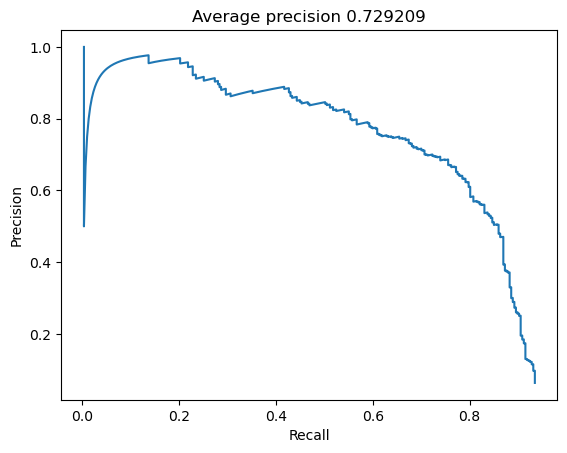

In [ ]:

if params.has_annotations:
    all_facial_detector.hard_mine_detections(detections, scores, file_names)

# pt vizualizare
if params.has_annotations:
    all_facial_detector.eval_detections(detections, scores, file_names)
    show_detections_with_ground_truth(detections, scores, file_names, params)
else:
    show_detections_without_ground_truth(detections, scores, file_names, params)